### Installations

In [184]:
# !pip install pandas 
# !pip install seaborn 
# !pip install nltk
# !pip install scikit-learn
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 43.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]━━━━━━ 4/5 [nltk]]]


## Data Preparation & EDA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

from collections import Counter

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250911031321,2025-09-11,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.93,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.87
1,28871,https://www.airbnb.com/rooms/28871,20250911031321,2025-09-11,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.93,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.99
2,29051,https://www.airbnb.com/rooms/29051,20250911031321,2025-09-11,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.81
3,44391,https://www.airbnb.com/rooms/44391,20250911031321,2025-09-11,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,48373,https://www.airbnb.com/rooms/48373,20250911031321,2025-09-11,previous scrape,Cozy family home in Amsterdam South,Charming modern apartment in the quiet and gre...,Apartment is located between Amsterdamse Bos a...,https://a0.muscache.com/pictures/miso/Hosting-...,220434,...,5.00,4.60,5.00,0363 4A2B A6AD 0196 F684,f,1,1,0,0,0.19


In [4]:
df.shape

(10480, 79)

In [5]:
df.info()
# we only have price for ±50-60% of the data, we need to filter out all null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10480 non-null  int64  
 1   listing_url                                   10480 non-null  object 
 2   scrape_id                                     10480 non-null  int64  
 3   last_scraped                                  10480 non-null  object 
 4   source                                        10480 non-null  object 
 5   name                                          10480 non-null  object 
 6   description                                   10132 non-null  object 
 7   neighborhood_overview                         5192 non-null   object 
 8   picture_url                                   10480 non-null  object 
 9   host_id                                       10480 non-null 

In [6]:
df_c = df[~df['price'].isna()]

In [7]:
df_c.isna().mean().sort_values(ascending=False).head(10)

neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
host_neighbourhood              0.754341
neighbourhood                   0.530984
neighborhood_overview           0.530984
host_about                      0.468505
host_response_rate              0.144876
host_response_time              0.144876
host_location                   0.117297
last_review                     0.111679
dtype: float64

In [8]:
for col in df_c.columns:
    print("=" * 50)
    print(f"Column: {col}")
    vc = df[col].value_counts(normalize=True).head(10) * 100
    print(vc.round(2).astype(str) + "%")

Column: id
id
27886    0.01%
28871    0.01%
29051    0.01%
44391    0.01%
48373    0.01%
49552    0.01%
50263    0.01%
50515    0.01%
50523    0.01%
53921    0.01%
Name: proportion, dtype: object
Column: listing_url
listing_url
https://www.airbnb.com/rooms/27886    0.01%
https://www.airbnb.com/rooms/28871    0.01%
https://www.airbnb.com/rooms/29051    0.01%
https://www.airbnb.com/rooms/44391    0.01%
https://www.airbnb.com/rooms/48373    0.01%
https://www.airbnb.com/rooms/49552    0.01%
https://www.airbnb.com/rooms/50263    0.01%
https://www.airbnb.com/rooms/50515    0.01%
https://www.airbnb.com/rooms/50523    0.01%
https://www.airbnb.com/rooms/53921    0.01%
Name: proportion, dtype: object
Column: scrape_id
scrape_id
20250911031321    100.0%
Name: proportion, dtype: object
Column: last_scraped
last_scraped
2025-09-11    100.0%
Name: proportion, dtype: object
Column: source
source
city scrape        56.6%
previous scrape    43.4%
Name: proportion, dtype: object
Column: name
name
Appart

In [9]:
# Based on the results above we can remove 32 columns (they are either not useful or redundant). 6 columns we will keep for EDA stage just in case
# 3 columns are long descriptions, we can think of translating them to length or binary columns. 
# The idea is that if a host left any info about them people are more likely to trust them and book the apartment, for example 
# The rest were kept for further transformation and investigation. Most of them are object types, and some are very similar, we need to investigate the difference and probably keep one. 

remove = ['scrape_id', 'last_scraped', 'source', 'picture_url',  'host_thumbnail_url', 'host_picture_url', 'neighbourhood', 
         'neighbourhood_group_cleansed', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'license', 'bathrooms_text', 
         'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
         'availability_30', 'availability_60', 'availability_90', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 
         'number_of_reviews_ly', 'estimated_revenue_l365d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
only_for_eda = ['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name']
long_text = ['description', 'neighborhood_overview', 'host_about']
keep_transform = ['host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
                  'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 
                  'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
                  'bathrooms',  'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',  
                  'availability_365', 'number_of_reviews', 
                  'estimated_occupancy_l365d', 'first_review' , 'last_review', 
                  'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value', 'instant_bookable']

In [10]:
cols_to_keep = only_for_eda + long_text + keep_transform

df_new = df_c[cols_to_keep].copy()

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 10479
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5874 non-null   int64  
 1   listing_url                  5874 non-null   object 
 2   name                         5874 non-null   object 
 3   host_id                      5874 non-null   int64  
 4   host_url                     5874 non-null   object 
 5   host_name                    5872 non-null   object 
 6   description                  5657 non-null   object 
 7   neighborhood_overview        2755 non-null   object 
 8   host_about                   3122 non-null   object 
 9   host_since                   5872 non-null   object 
 10  host_location                5185 non-null   object 
 11  host_response_time           5023 non-null   object 
 12  host_response_rate           5023 non-null   object 
 13  host_acceptance_rate  

#### 0: Price

In [12]:
# Remove $ and commas, convert to float
df_new['price'] = df_new['price'].replace({'\$':'', ',':''}, regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_2046/3647304214.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_new['price'] = df_new['price'].replace({'\$':'', ',':''}, regex=True).astype(float)


In [13]:
df_new['price'].describe()

count     5874.000000
mean       336.785155
std       1985.661882
min         35.000000
25%        161.000000
50%        222.000000
75%        314.000000
max      80018.000000
Name: price, dtype: float64

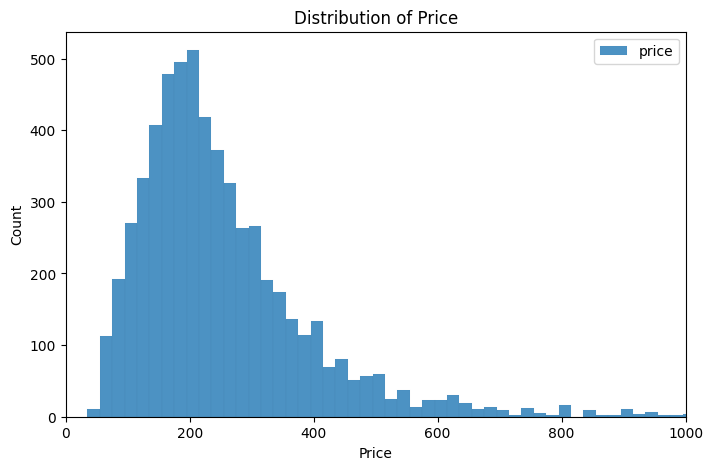

In [14]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df_new["price"],
    binwidth=20,
    alpha=0.8,
    label="price"
)

plt.xlim(0, 1000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.legend()

plt.show()

In [15]:
# There is a small amount of outliers which we would want to remove to avoid unnecessary skew
display(df_new['price'][df_new['price'] > 1000].count())
df_new = df_new[df_new['price'] < 1000]

np.int64(55)

In [16]:
df_new['price_class'] = pd.qcut(
    df_new['price'],
    q=[0, 0.25, 0.75, 1],
    labels=['Affordable', 'Market rate', 'High-value']
)

In [17]:
# As we want to do a classification problem this time our target variable will likely be price class
df_new['price_class'].value_counts()

price_class
Market rate    2907
Affordable     1472
High-value     1437
Name: count, dtype: int64

#### 1: Date columns

In [18]:
scrape_date = pd.to_datetime("2025-09-11")

date_cols = ["host_since", "first_review", "last_review"]

for col in date_cols:
    df_new[col] = pd.to_datetime(df_new[col], errors="coerce")
    #df_new[f"{col}_days_since"] = (scrape_date - df_new[col]).dt.days
    df_new[f"{col}_months_since"] = ((scrape_date - df_new[col]).dt.days / 30).round(1)

#df_new = df_new.drop(columns=date_cols)

In [19]:
features_ready = ['host_since_months_since', 'first_review_months_since', 'last_review_months_since']
# host_since_months_since : trustworthy host 
# first_review_months_since: apartment has been published for a while -> more trust 
# last_review_months_since: there are recent reviews which are more relevant 

#### 2: Host Listings

In [20]:
# We have two very similar columns, do we need them both as features? What is their additional value? 
display(df_new[["host_listings_count", "host_total_listings_count"]].describe())
# Most hosts have only 1 listing, total_listings seem to be higher than just listings 

display(df_new[["host_listings_count", "host_total_listings_count"]].corr())
# Correlation is very high, two separate metrics are unnecessary 

display((df_new["host_total_listings_count"] < df_new["host_listings_count"]).mean())
# Total listings are always higher or equal to just listings

# Based on available documentation we can assume that: 
# host_listings_count → number of listings the host has in this city 
# host_total_listings_count → total number of listings the host has on Airbnb globally

,host_listings_count,host_total_listings_count
count,5814.000000,5814.000000
mean,3.347437,5.207430
std,24.463738,48.925587
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,957.000000,1655.000000


,host_listings_count,host_total_listings_count
host_listings_count,1.000000,0.901019
host_total_listings_count,0.901019,1.000000


np.float64(0.0)

In [21]:
# To have a clear added value of both we can engineer a new metric 
df_new['host_local_share'] = (
    df_new['host_listings_count'] / df_new['host_total_listings_count']
).replace([np.inf, np.nan], 1)

In [22]:
features_ready+=['host_listings_count', 'host_local_share']

#### Location

In [23]:
# We want a numeric feature that will show if an apartment is far from the city centre
# Let's hardcode city centre as Dam Square 
city_centre_lat = 52.373056
city_centre_lon = 4.892778

In [24]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance (km) between two points on the Earth.
    """
    R = 6371  # Earth radius in km
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance = R * c
    return distance

In [25]:
df_new['distance_to_city_centre'] = df_new.apply(
    lambda row: haversine_distance(row['latitude'], row['longitude'], city_centre_lat, city_centre_lon),
    axis=1
)

In [26]:
df_new[['latitude', 'longitude', 'distance_to_city_centre']].describe()

,latitude,longitude,distance_to_city_centre
count,5816.000000,5816.000000,5816.000000
mean,52.367090,4.889151,2.663606
std,0.017196,0.034824,1.628251
min,52.291220,4.755870,0.037881
25%,52.356070,4.865124,1.523997
50%,52.366035,4.887660,2.405970
75%,52.376740,4.907463,3.310147
max,52.425120,5.028150,11.016006


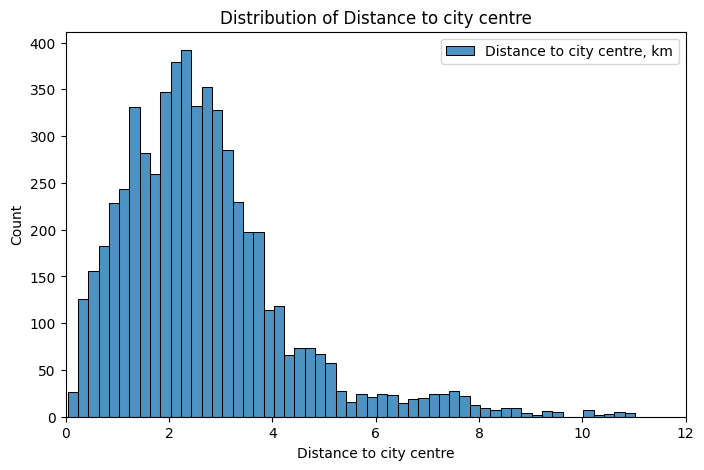

In [27]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df_new['distance_to_city_centre'],
    binwidth=0.2,
    alpha=0.8,
    label="Distance to city centre, km"
)

plt.xlim(0, 12)
plt.xlabel("Distance to city centre")
plt.ylabel("Count")
plt.title("Distribution of Distance to city centre")
plt.legend()

plt.show()

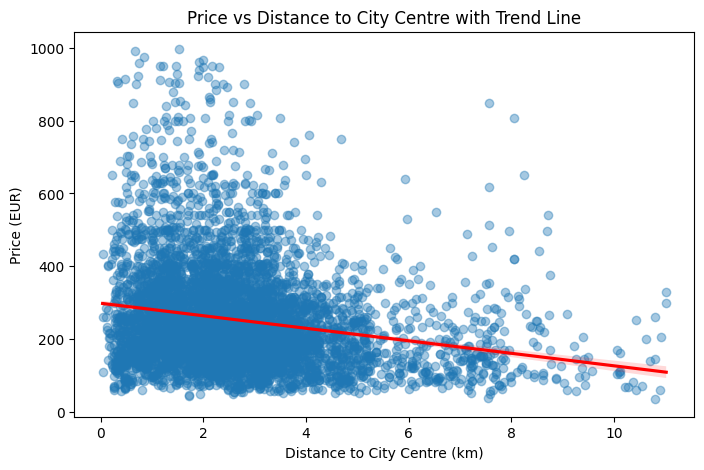

In [28]:
plt.figure(figsize=(8,5))

# Scatter + trend line
sns.regplot(
    x='distance_to_city_centre',
    y='price',
    data=df_new,
    scatter_kws={'alpha':0.4},  # make points semi-transparent
    line_kws={'color':'red'},   # trend line color
    ci=95                       # 95% confidence interval (can set None to hide)
)

plt.xlabel("Distance to City Centre (km)")
plt.ylabel("Price (EUR)")
plt.title("Price vs Distance to City Centre with Trend Line")
plt.show()

In [29]:
corr = df_new[['price', 'distance_to_city_centre']].corr()
print("Correlation between price and distance:", corr.loc['price','distance_to_city_centre'])

Correlation between price and distance: -0.20151698538683577


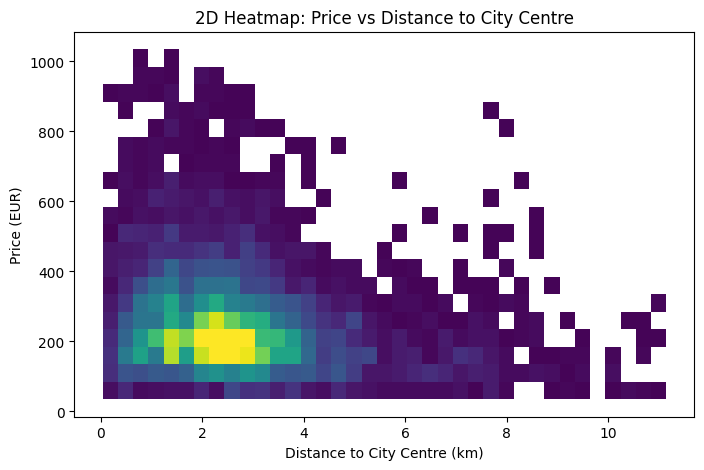

In [30]:
plt.figure(figsize=(8,5))

# Binning
sns.histplot(
    data=df_new,
    x='distance_to_city_centre',
    y='price',
    binwidth=[0.3, 50],   # 30 bins for distance, 50 bins for price
    pmax=0.9,        # optional, limits extreme counts for color scaling
    cmap='viridis'
)

plt.xlabel("Distance to City Centre (km)")
plt.ylabel("Price (EUR)")
plt.title("2D Heatmap: Price vs Distance to City Centre")
plt.show()


In [31]:
# Correlation is visible though not very strong. The metric is expected to be very meaningful for the analysis 
features_ready.append('distance_to_city_centre')

#### Amenities

In [32]:
# We have a huge list of amenities that would be nice to aggregate and utilise somehow


# Total number of listings
total_listings = len(df_new)

# Clean and explode amenities
all_amenities = df_new['amenities'].dropna().str.replace(r'[\[\]"]', '', regex=True)
amenities_list = all_amenities.str.split(',').explode().str.strip()

# Count occurrences
amenities_count = Counter(amenities_list)

# Convert to percentages and round to 1 decimal
amenities_percent = {k: round(v / total_listings * 100, 1) for k, v in amenities_count.items()}

# Sort by percentage
amenities_percent_sorted = dict(sorted(amenities_percent.items(), key=lambda x: x[1], reverse=True))

# Length of the dict 
display(len(amenities_percent_sorted.items()))

# Display top 50
display(list(amenities_percent_sorted.items())[:50])

top_50 = list(amenities_percent_sorted.keys())[:50]

1924

[('Smoke alarm', 91.5),
 ('Wifi', 90.5),
 ('Hot water', 80.8),
 ('Kitchen', 80.2),
 ('Bed linens', 74.1),
 ('Dishes and silverware', 73.6),
 ('Essentials', 70.0),
 ('Hair dryer', 69.1),
 ('Refrigerator', 67.0),
 ('Hangers', 65.1),
 ('Iron', 61.2),
 ('Carbon monoxide alarm', 59.9),
 ('Cooking basics', 59.7),
 ('Dedicated workspace', 56.9),
 ('Hot water kettle', 56.1),
 ('Wine glasses', 53.3),
 ('Dishwasher', 53.3),
 ('Washer', 52.9),
 ('Dining table', 51.8),
 ('Shampoo', 50.8),
 ('TV', 50.8),
 ('Heating', 49.9),
 ('Fire extinguisher', 49.7),
 ('Cleaning products', 46.2),
 ('Microwave', 46.1),
 ('Freezer', 46.0),
 ('First aid kit', 45.0),
 ('Coffee', 43.9),
 ('Private entrance', 41.3),
 ('Oven', 39.3),
 ('Coffee maker', 39.1),
 ('Shower gel', 37.6),
 ('Extra pillows and blankets', 37.4),
 ('Body soap', 36.9),
 ('Central heating', 34.4),
 ('Host greets you', 33.6),
 ('Drying rack for clothing', 33.6),
 ('Self check-in', 31.1),
 ('Room-darkening shades', 30.9),
 ('Outdoor dining area', 30.

In [33]:
# First, make sure 'amenities' column is a list of strings, not a single string
# If it's a string like "{Wifi, Kitchen, Hot water}", remove braces and split
df_new['amenities_list'] = (
    df_new['amenities']
    .str.strip('[]')                # remove starting and ending brackets
    .str.replace('"', '', regex=True)  # remove quotes
    .str.split(',\s*')              # split by comma + optional spaces
)


# --- Individual important amenities ---
key_amenities = ['Wifi', 'Kitchen', 'Dedicated workspace', 'Air conditioning', 'Heating']
for amenity in key_amenities:
    df_new[f'has_{amenity.lower().replace(" ", "_")}'] = df_new['amenities_list'].apply(lambda x: amenity in x)

# Assign to categories
comfort = [
    "Hair dryer", "Bed linens", "Extra pillows and blankets", "Shampoo", "Body soap",
    "Essentials", "Dishes and silverware", "Dining table", "Coffee", "Shower gel",
    "Hot water kettle", "Microwave", "Freezer", "Blender", "Toaster","Refrigerator", "Dishwasher", "Oven", 
    "Wine glasses", "Hot water"
]

safety = [
    "Smoke alarm", "Carbon monoxide alarm", "Fire extinguisher", "First aid kit", "Lockbox"
]

luxury = [
    "Private entrance", "Room-darkening shades", "Outdoor dining area",
    "Private patio or balcony", "Outdoor furniture", "Books and reading material",
    "Laundromat nearby", "Stove", "Bathtub", "Host greets you", "Drying rack for clothing",
    "Self check-in"
]

family = ['Crib', 'High chair', 'Changing table', "Children's books and toys", 'Baby monitor', 'Pool', 'Playground']
tech = ['Netflix', 'HBO', 'Disney+', 'Apple TV', 'Sound system', 'Bluetooth', 'Game console']

# Ensure all top-50 amenities are included in at least one category
included = set(comfort + safety + luxury + family + tech + key_amenities)
for amenity in top_50:
    if amenity not in included:
        comfort.append(amenity)  # default to comfort if not obvious

# Function to compute % score
def compute_score(amenities, category):
    return sum(amenity in amenities for amenity in category) / len(category)

df_new['score_comfort'] =df_new['amenities_list'].apply(lambda x: compute_score(x, comfort))
df_new['score_safety'] = df_new['amenities_list'].apply(lambda x: compute_score(x, safety))
df_new['score_luxury'] = df_new['amenities_list'].apply(lambda x: compute_score(x, luxury))
df_new['score_family'] = df_new['amenities_list'].apply(lambda x: compute_score(x, family))
df_new['score_tech'] = df_new['amenities_list'].apply(lambda x: compute_score(x, tech))


# Compute amenities_count excluding scored amenities
df_new['amenities_count'] = df_new['amenities_list'].apply(
    lambda x: sum(1 for a in x if a not in included)
)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2046/1688427427.py:7: SyntaxWarning: invalid escape sequence '\s'
  .str.split(',\s*')              # split by comma + optional spaces


In [34]:
# Check
df_new[['has_wifi','has_kitchen', 'has_dedicated_workspace', 'has_heating', 'has_air_conditioning', 'score_comfort','score_safety','score_family','score_luxury','score_tech','amenities_count']].head()

,has_wifi,has_kitchen,has_dedicated_workspace,has_heating,has_air_conditioning,score_comfort,score_safety,score_family,score_luxury,score_tech,amenities_count
0,False,False,True,False,True,0.482759,0.6,0.000000,0.583333,0.000000,28
1,True,False,False,True,False,0.344828,0.6,0.000000,0.166667,0.000000,5
2,True,False,False,True,False,0.344828,0.6,0.000000,0.166667,0.000000,4
5,True,False,True,False,False,0.620690,0.8,0.428571,0.416667,0.000000,25
6,True,True,True,True,False,0.448276,0.8,0.285714,0.666667,0.142857,24


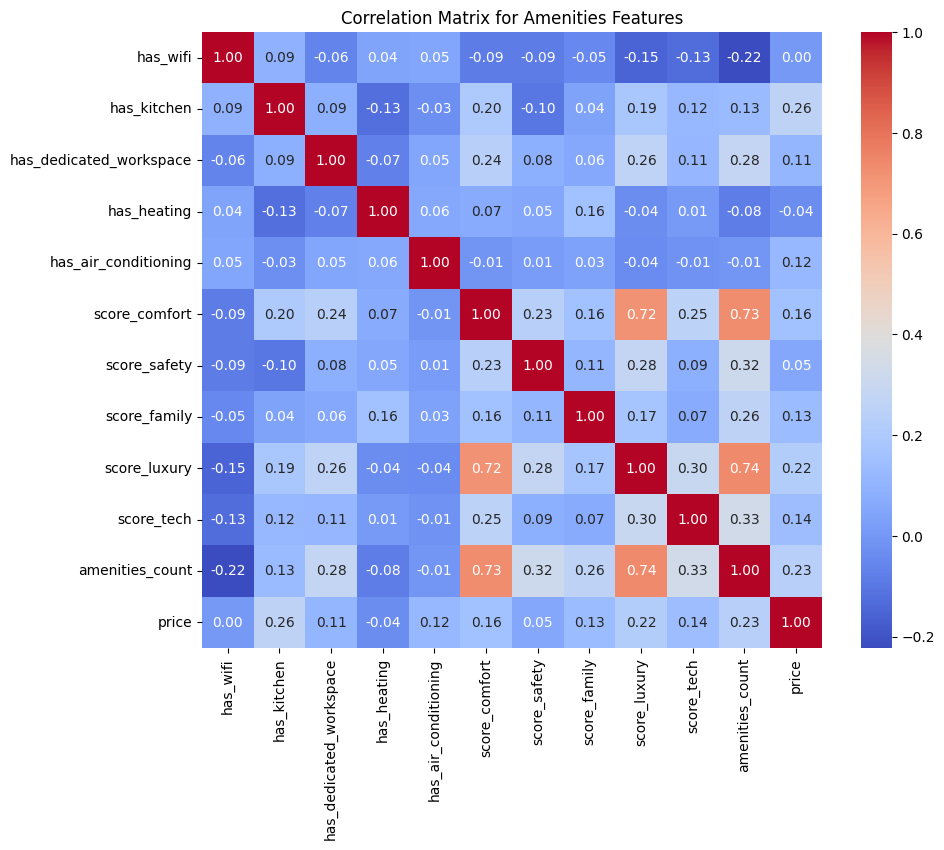

In [35]:
# Select the columns for correlation
cols = ['has_wifi','has_kitchen', 'has_dedicated_workspace', 
        'has_heating','has_air_conditioning', 'score_comfort','score_safety',
        'score_family','score_luxury','score_tech','amenities_count', 'price']

# Compute correlation matrix
corr_matrix = df_new[cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Amenities Features")
plt.show()

# Correlation between score_comfort, score_luxury and amenities_count is high, it might be redundant but I would keep all three for now
# Kitchen is highly correlated with price, then it's general amenities count and score_luxury.

In [36]:
# Adding these features to the list 
features_ready += ['has_wifi','has_kitchen', 'has_dedicated_workspace', 'has_heating', 'has_air_conditioning', 'score_comfort','score_safety','score_family','score_luxury','score_tech','amenities_count']

#### Reviews

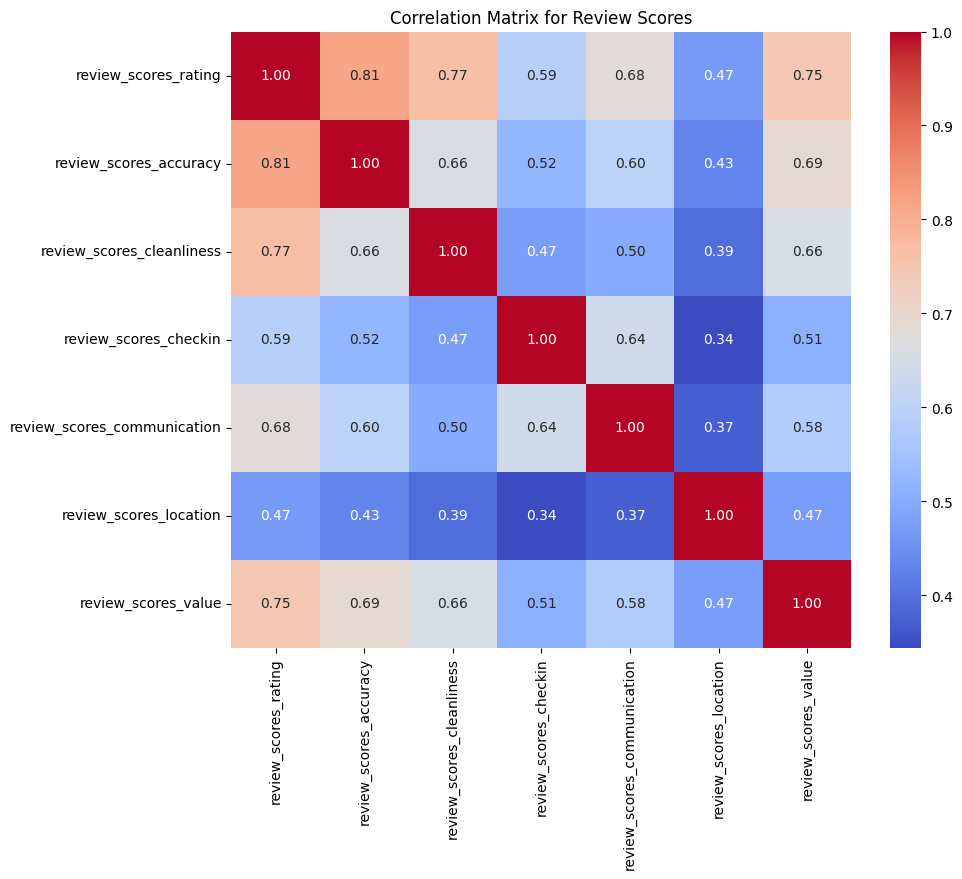

In [37]:
# Select the columns for correlation
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Compute correlation matrix
corr_matrix = df_new[cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Review Scores")
plt.show()

# Correlation between different categories of scores is, of course, positive but this is fine for us 
# To simplify we can try to only keep general score

In [38]:
features_ready += ['review_scores_rating']

#### Text Columns

In [39]:
# There are 3 short and 3 long text columns we might want to use
short_text = ['host_location',  'host_neighbourhood', 'neighbourhood_cleansed']
long_text = ['description', 'neighborhood_overview', 'host_about']

In [40]:
# For host location we want to know if host is a) in Amsterdam, b) in NL c) in another country -> we switch it to categorical 
def map_host_location(loc):
    if pd.isna(loc):
        return "other"
    
    loc = loc.lower()
    
    if "amsterdam" in loc:
        return "amsterdam"
    elif "netherlands" in loc:
        return "netherlands"
    else:
        return "other"

df_new['host_location_cat'] = df_new['host_location'].apply(map_host_location)

# neighbourhood_cleansed and host_neighbourhood don't bring any extra info, we can remove those 

In [41]:
df_new[['host_location_cat', 'host_location']].value_counts().head(30)

host_location_cat  host_location          
amsterdam          Amsterdam, Netherlands     4738
netherlands        Netherlands                 189
other              London, United Kingdom       13
netherlands        Utrecht, Netherlands          8
                   Rotterdam, Netherlands        7
other              Brussels, Belgium             7
netherlands        The Hague, Netherlands        6
                   Groningen, Netherlands        5
                   Bergen, Netherlands           5
                   Huizen, Netherlands           5
                   Amstelveen, Netherlands       5
                   Haarlem, Netherlands          4
other              Paris, France                 4
                   Barcelona, Spain              4
netherlands        Arnhem, Netherlands           4
other              New York, NY                  3
netherlands        Breda, Netherlands            3
                   Zunderdorp, Netherlands       3
other              Los Angeles, CA     

In [42]:
features_ready.append('host_location_cat')

In [43]:
# Mostly for fun (and maybe some value) let's do a simple sentiment analysis

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

for col in ['description', 'neighborhood_overview', 'host_about']:
    df_new[f'{col}_sentiment'] = (
        df_new[col]
        .fillna('')
        .apply(lambda x: sia.polarity_scores(x)['compound'])
    )
    df_new[f'{col}_length'] = df_new[col].fillna('').str.len()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


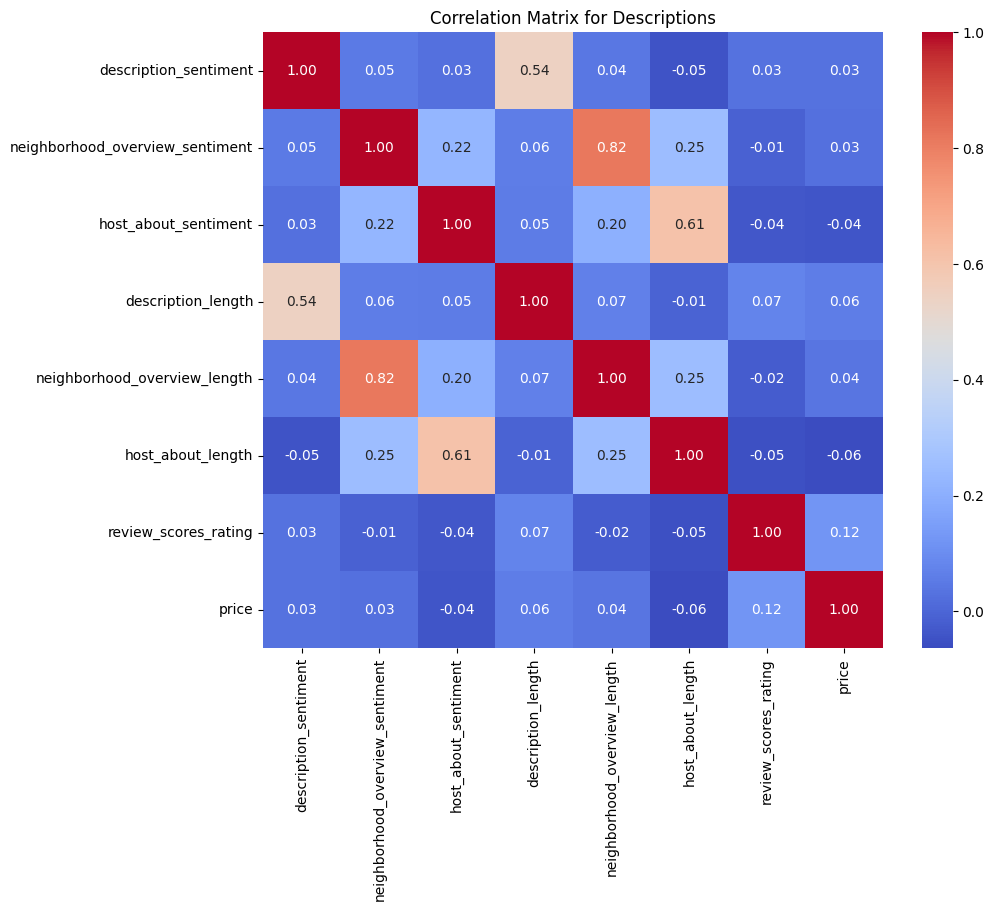

In [44]:
# Select the columns for correlation
cols = ['description_sentiment', 'neighborhood_overview_sentiment', 'host_about_sentiment', 
        'description_length', 'neighborhood_overview_length',
                  'host_about_length', 'review_scores_rating','price']

# Compute correlation matrix
corr_matrix = df_new[cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Descriptions")
plt.show()

# Surprisingly correlation of descriptions with price and review score does not really exist. 
# Only desctiption length has somewhat positive consistent correlation. 
# I want to only keep description and heighbourhood length then as it has a bit better correlation with price. 

In [45]:
features_ready += ['description_length', 'neighborhood_overview_length']

#### Existing numeric

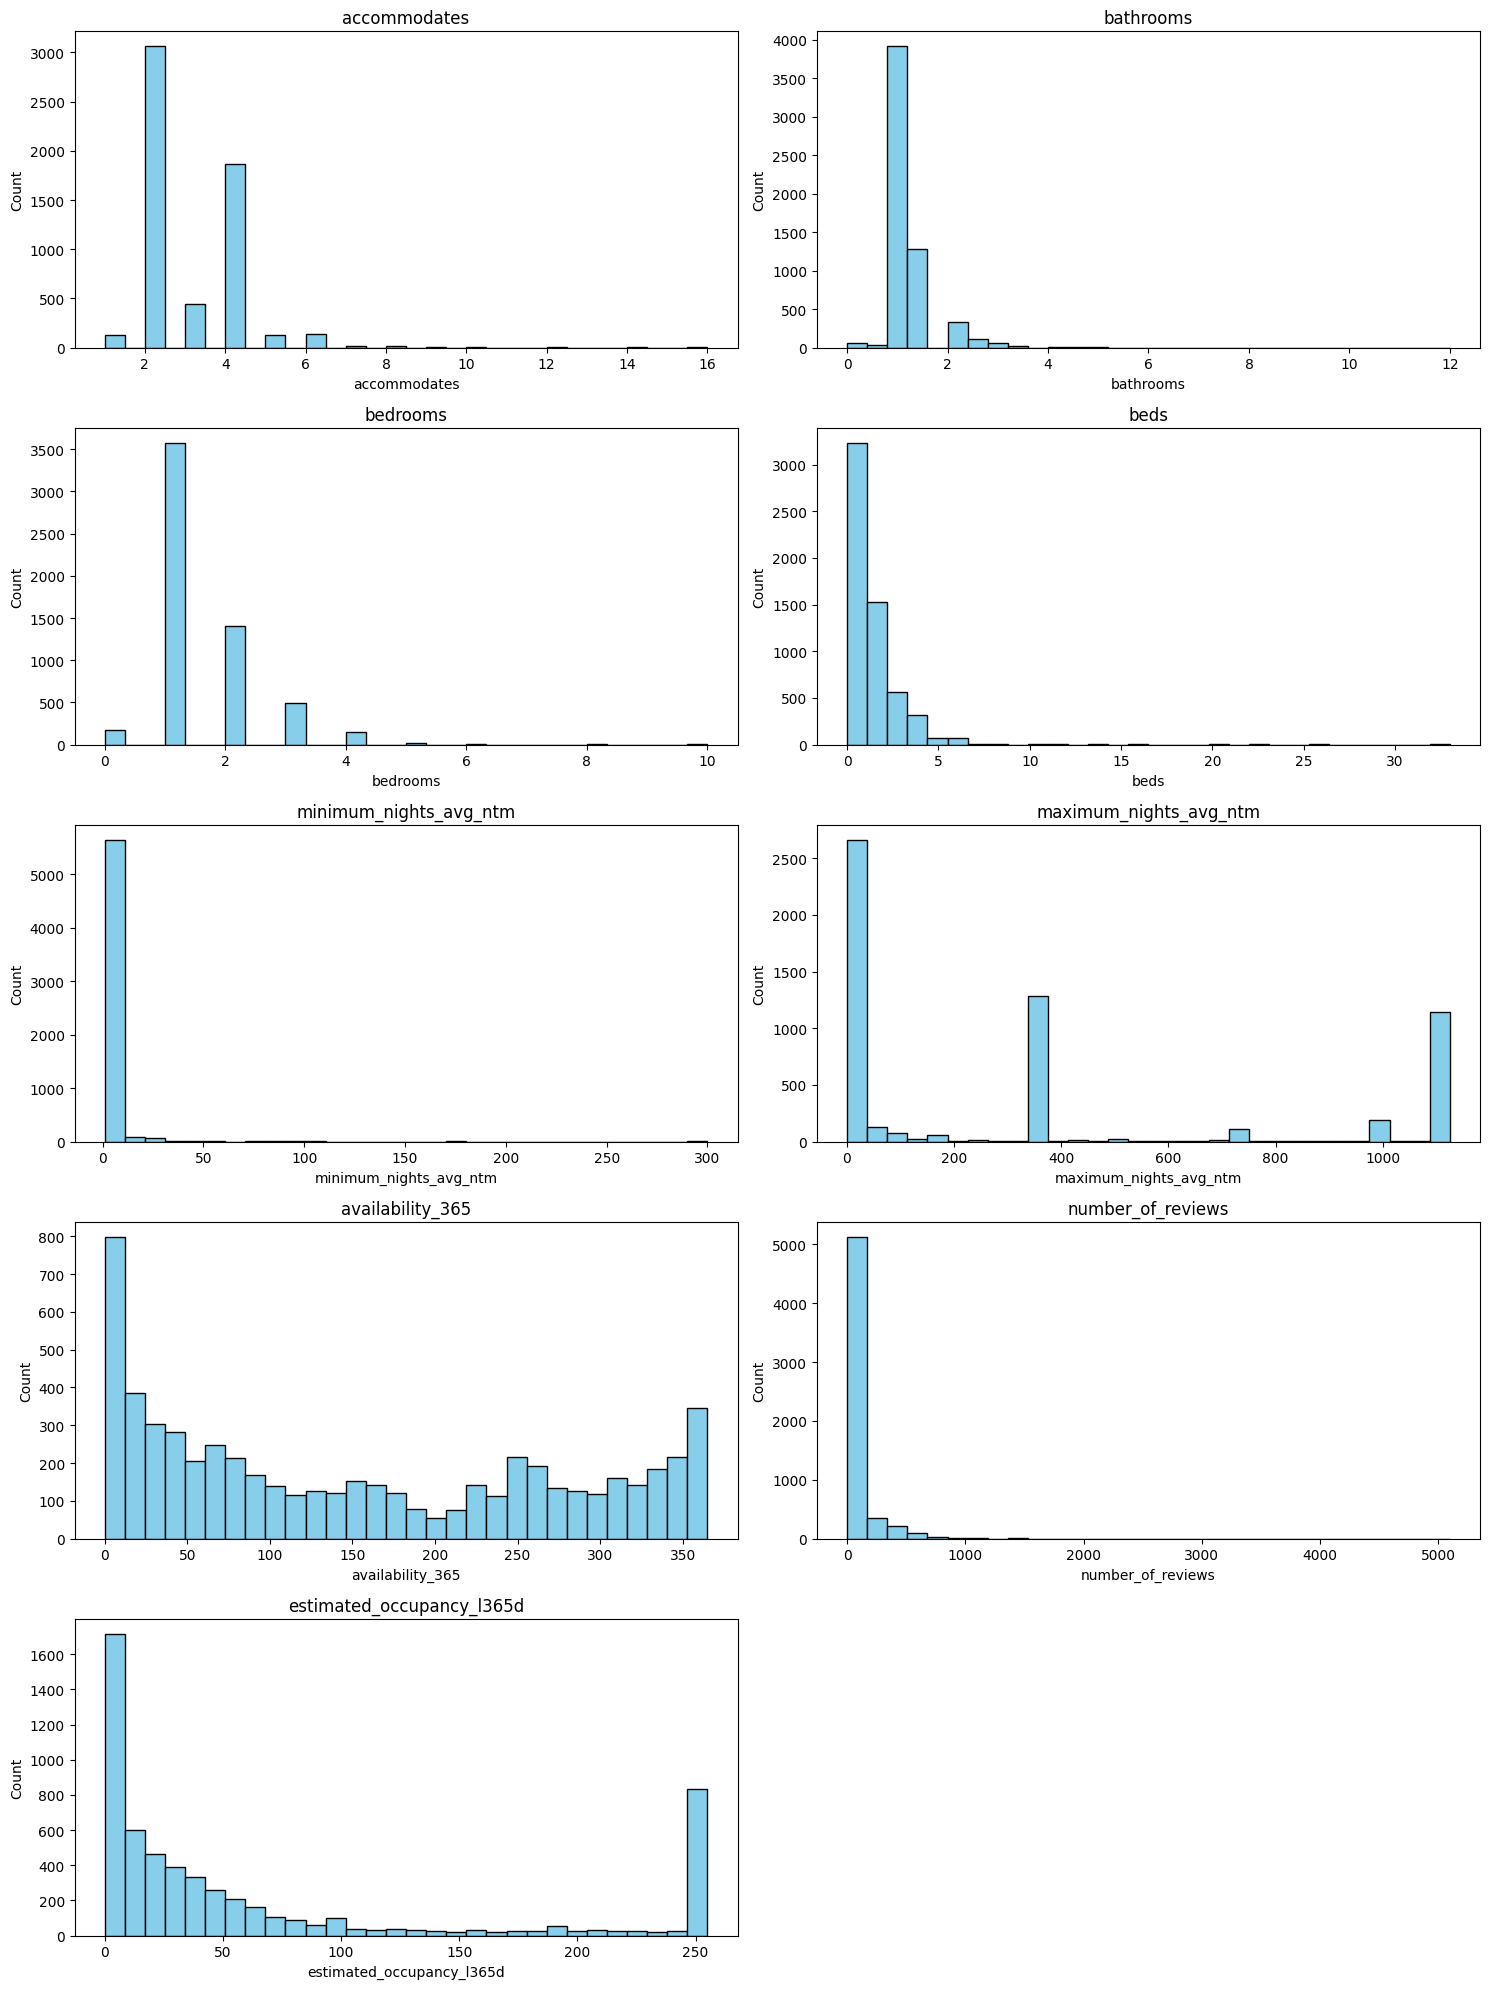

In [46]:
# there is a simple list of existing numeric columns that we can just add 

numeric = ['accommodates','bathrooms','bedrooms','beds',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
           'availability_365','number_of_reviews','estimated_occupancy_l365d']

# Set figure size
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns of subplots
    plt.hist(df_new[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

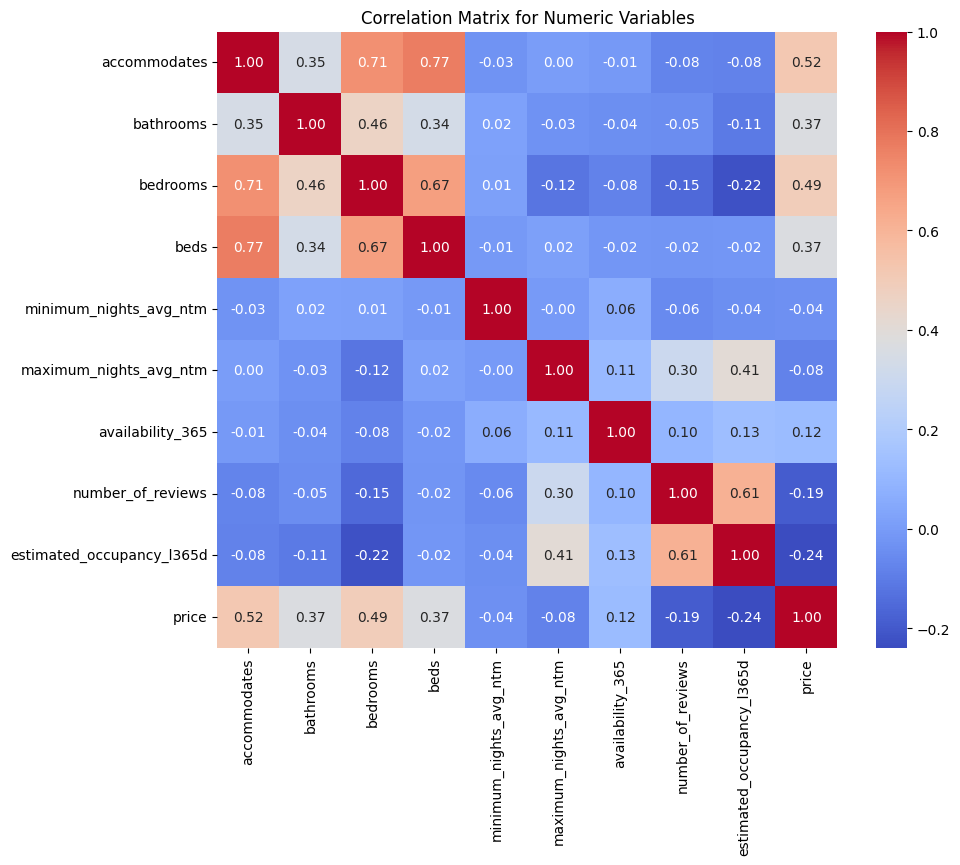

In [47]:
# Select the columns for correlation
cols = ['accommodates','bathrooms','bedrooms','beds',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
           'availability_365','number_of_reviews','estimated_occupancy_l365d', 'price']

# Compute correlation matrix
corr_matrix = df_new[cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()

# Minimum and maximum nights seem irrelevant 
# Accommodates, bedrooms and beds are all too highly correlated, maybe it makes sense to keep only accommodates 

In [48]:
features_ready += ['accommodates','bathrooms', 'availability_365','number_of_reviews','estimated_occupancy_l365d']


--- property_type ---


/tmp/ipykernel_2046/373712804.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x=col, order=counts.index, palette='pastel')


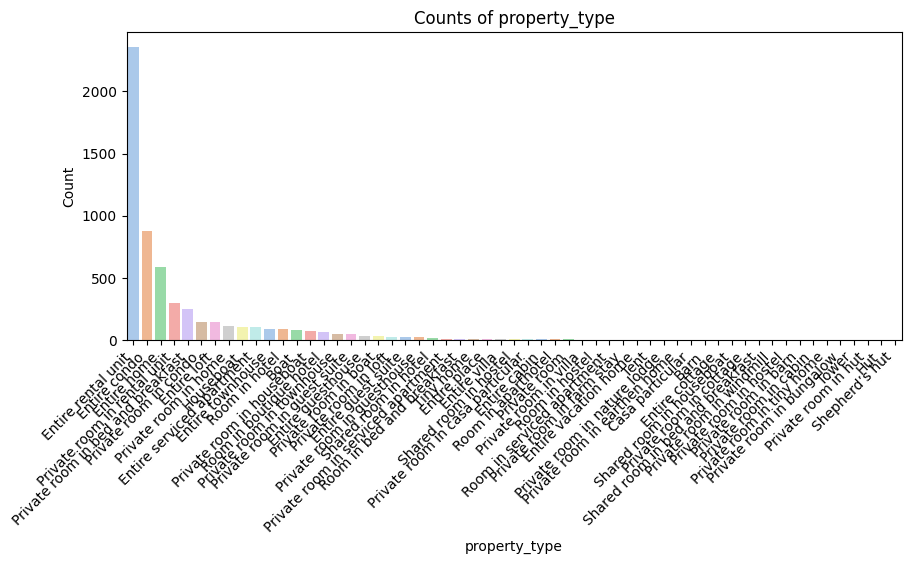


--- room_type ---


/tmp/ipykernel_2046/373712804.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x=col, order=counts.index, palette='pastel')


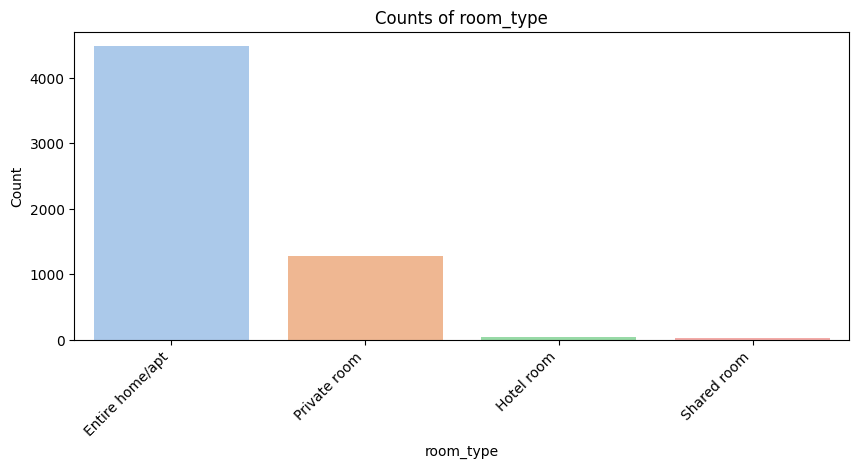


--- host_response_time ---


/tmp/ipykernel_2046/373712804.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x=col, order=counts.index, palette='pastel')


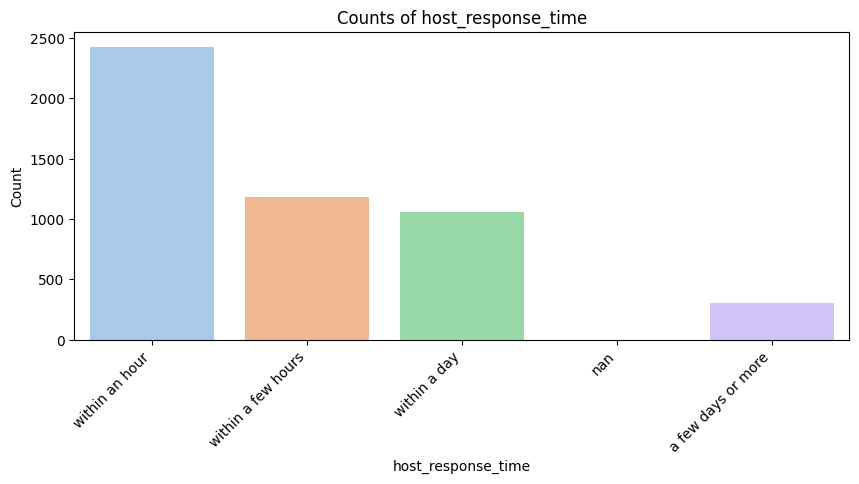

In [49]:
categorical = ['property_type', 'room_type', 'host_response_time']

# Property type is too detailed, I would remove it 

for col in categorical:
    print(f"\n--- {col} ---")
    
    # Value counts
    counts = df_new[col].value_counts(dropna=False)
    
    # Bar plot
    plt.figure(figsize=(10,4))
    sns.countplot(data=df_new, x=col, order=counts.index, palette='pastel')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Counts of {col}")
    plt.ylabel("Count")
    plt.show()

In [50]:
features_ready += ['room_type', 'host_response_time']

#### Rates 

In [51]:
should_be_numeric = ['host_response_rate', 'host_acceptance_rate']


for col in should_be_numeric:
    df_new[col] = (
        df_new[col]
        .str.replace('%', '', regex=False)  # remove %
        .astype(float)                       # convert to float
    )

In [52]:
features_ready += ['host_response_rate', 'host_acceptance_rate']

#### Binary 

In [53]:
should_be_binary = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'instant_bookable']

for col in should_be_binary:
    # If it's string 't'/'f', map to 1/0. If boolean, astype(int) works too
    df_new[f'{col}_binary'] = df_new[col].map({'t': 1, 'f': 0}).fillna(0)  # keeps existing if not 't'/'f'
    display(df_new[[f'{col}_binary', col]].value_counts(dropna = False))

# Number of NaN is insignificant
# Profile pic percent is so small it doesn't make a difference 

host_is_superhost_binary  host_is_superhost
0.0                       f                    4277
1.0                       t                    1482
0.0                       NaN                    57
Name: count, dtype: int64

host_has_profile_pic_binary  host_has_profile_pic
1.0                          t                       5728
0.0                          f                         86
                             NaN                        2
Name: count, dtype: int64

host_identity_verified_binary  host_identity_verified
1.0                            t                         5605
0.0                            f                          209
                               NaN                          2
Name: count, dtype: int64

instant_bookable_binary  instant_bookable
0                        f                   4734
1                        t                   1082
Name: count, dtype: int64

In [54]:
features_ready += ['host_is_superhost_binary', 'host_identity_verified_binary', 'instant_bookable_binary']

## Model Training

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel

# this is because I got curious and wanted to see if predicting price directly would perform much better 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [56]:
features_ready.append('price_class')

In [57]:
# Ideally we don't want to drop all NaN but with current time limitations let's just do that 
df_model = df_new[features_ready].dropna()

In [58]:
# --- Features & target ---
X = df_model.drop(columns=['price_class'])
y = df_model['price_class']

In [59]:
# For XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts to 0,1,2
print(list(le.classes_)) 

['Affordable', 'High-value', 'Market rate']


In [60]:
# --- Split ---
# First split: Train + Val vs Test (80/20)
X_fulltrain, X_test, y_fulltrain, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Second split: Train vs Val (60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_fulltrain, y_fulltrain, test_size=0.25, random_state=42
)

In [61]:
# --- Identify feature types ---
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_nominal = ['room_type', 'host_response_time']  # OneHotEncoding

In [62]:
# --- ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat_nom', OneHotEncoder(handle_unknown='ignore'), categorical_nominal)
    ]
)

In [63]:
# --- 1. Logistic Regression Pipeline ---
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Train predictions
y_train_pred = grid_lr.predict(X_train)

# Validation predictions
y_val_pred = grid_lr.predict(X_val)

print("--- LOGISTIC REGRESSION ---")

print("\n=== TRAIN RESULTS ===")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))

print("\n=== VALIDATION RESULTS ===")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

--- LOGISTIC REGRESSION ---

=== TRAIN RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.77      0.63      0.69       740
  High-value       0.75      0.58      0.65       649
 Market rate       0.67      0.81      0.73      1291

    accuracy                           0.70      2680
   macro avg       0.73      0.67      0.69      2680
weighted avg       0.71      0.70      0.70      2680


=== VALIDATION RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.80      0.61      0.70       251
  High-value       0.66      0.56      0.61       210
 Market rate       0.65      0.79      0.72       433

    accuracy                           0.69       894
   macro avg       0.71      0.65      0.67       894
weighted avg       0.70      0.69      0.68       894



In [64]:
# --- 2. Random Forest Pipeline ---
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Train predictions
y_train_pred_rf = grid_rf.predict(X_train)

# Validation predictions
y_val_pred_rf = grid_rf.predict(X_val)


print("--- RANDOM FOREST ---")
print("Random Forest Best Params:", grid_rf.best_params_)


print("\n=== TRAIN RESULTS ===")
print(classification_report(y_train, y_train_pred_rf, target_names=le.classes_))

print("\n=== VALIDATION RESULTS ===")
print(classification_report(y_val, y_val_pred_rf, target_names=le.classes_))

/usr/local/python/3.12.1/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--- RANDOM FOREST ---
Random Forest Best Params: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

=== TRAIN RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.99      0.97      0.98       740
  High-value       1.00      0.98      0.99       649
 Market rate       0.98      1.00      0.99      1291

    accuracy                           0.99      2680
   macro avg       0.99      0.98      0.99      2680
weighted avg       0.99      0.99      0.99      2680


=== VALIDATION RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.83      0.63      0.72       251
  High-value       0.69      0.52      0.59       210
 Market rate       0.65      0.82      0.73       433

    accuracy                           0.70       894
   macro avg       0.73      0.66      0.68       894
weighted avg       0.71      0.70      0.69       894



### It completely overfits, which is probably caused by max_depth = None, let's try again 

In [85]:
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [3, 5 , 8 , 10],
    'rf__min_samples_split': [10, 20, 50],
    'rf__min_samples_leaf': [5, 10, 20],
    'rf__max_features': ['sqrt', 0.5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Train predictions
y_train_pred_rf = grid_rf.predict(X_train)

# Validation predictions
y_val_pred_rf = grid_rf.predict(X_val)


print("--- RANDOM FOREST ---")
print("Random Forest Best Params:", grid_rf.best_params_)


print("\n=== TRAIN RESULTS ===")
print(classification_report(y_train, y_train_pred_rf, target_names=le.classes_))

print("\n=== VALIDATION RESULTS ===")
print(classification_report(y_val, y_val_pred_rf, target_names=le.classes_))

/usr/local/python/3.12.1/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--- RANDOM FOREST ---
Random Forest Best Params: {'rf__max_depth': 10, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}

=== TRAIN RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.93      0.72      0.81       740
  High-value       0.92      0.77      0.84       649
 Market rate       0.79      0.95      0.86      1291

    accuracy                           0.84      2680
   macro avg       0.88      0.82      0.84      2680
weighted avg       0.86      0.84      0.84      2680


=== VALIDATION RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.82      0.64      0.72       251
  High-value       0.68      0.56      0.61       210
 Market rate       0.65      0.79      0.72       433

    accuracy                           0.69       894
   macro avg       0.72      0.66      0.68       894
weighted avg       0.70      0.69      0.69       894



In [66]:
# --- 3. XGBoost Pipeline ---
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier(eval_metric='mlogloss',  random_state=42))
])

param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 1.0],
    'xgb__colsample_bytree': [0.7, 1.0]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Train predictions
y_train_pred_xgb = grid_xgb.predict(X_train)

# Validation predictions
y_pred_xgb = grid_xgb.predict(X_val)


print("--- XGBoost ---")
print("XGBoost Best Params:", grid_xgb.best_params_)


print("\n=== TRAIN RESULTS ===")
print(classification_report(y_train, y_train_pred_xgb, target_names=le.classes_))

print("\n=== VALIDATION RESULTS ===")
print(classification_report(y_val, y_pred_xgb, target_names=le.classes_))

--- XGBoost ---
XGBoost Best Params: {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}

=== TRAIN RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.91      0.75      0.82       740
  High-value       0.90      0.80      0.85       649
 Market rate       0.80      0.92      0.86      1291

    accuracy                           0.85      2680
   macro avg       0.87      0.82      0.84      2680
weighted avg       0.86      0.85      0.85      2680


=== VALIDATION RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.79      0.63      0.70       251
  High-value       0.65      0.60      0.63       210
 Market rate       0.66      0.76      0.71       433

    accuracy                           0.69       894
   macro avg       0.70      0.67      0.68       894
weighted avg       0.69      0.69      0.69       894



##### The results are not satisfying, it seems too overfit; Let's try XGBoost one more time, this time a bit differently 

In [74]:
# 2️⃣ XGBoost model
xgb_model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

# 3️⃣ Feature selection wrapper 
selector = SelectFromModel(xgb_model, threshold='median')  # keep features above median importance

In [75]:
# 4️⃣ Full pipeline
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', selector),
    ('xgb', xgb_model)
])

In [76]:
# 5️⃣ Expanded hyperparameter grid
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 500],
    'xgb__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.85, 1.0],
    'xgb__colsample_bytree': [0.7, 0.85, 1.0],
    'xgb__gamma': [0, 0.1, 0.3],          # min loss reduction for split
    'xgb__reg_alpha': [0, 0.1, 0.5],      # L1 regularization
    'xgb__reg_lambda': [1, 1.5, 2]        # L2 regularization
}

In [77]:
# 6️⃣ GridSearch with early stopping
random_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_grid_xgb,
    n_iter=30,        # ← key parameter
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [78]:
random_xgb.fit(
    X_train, y_train
)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'xgb__colsample_bytree': [0.7, 0.85, ...], 'xgb__gamma': [0, 0.1, ...], 'xgb__learning_rate': [0.01, 0.05, ...], 'xgb__max_depth': [3, 6, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",30
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies t

In [79]:
best_model = random_xgb.best_estimator_

# Train predictions
y_train_pred = best_model.predict(X_train)

# Validation predictions
y_val_pred = best_model.predict(X_val)

print("=== TRAIN RESULTS ===")
print(classification_report(y_train, y_train_pred))

print("\n=== VALIDATION RESULTS ===")
print(classification_report(y_val, y_val_pred))

=== TRAIN RESULTS ===
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       740
           1       0.94      0.88      0.91       649
           2       0.86      0.96      0.91      1291

    accuracy                           0.90      2680
   macro avg       0.92      0.89      0.90      2680
weighted avg       0.91      0.90      0.90      2680


=== VALIDATION RESULTS ===
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       251
           1       0.69      0.58      0.63       210
           2       0.67      0.80      0.73       433

    accuracy                           0.71       894
   macro avg       0.73      0.68      0.70       894
weighted avg       0.72      0.71      0.71       894



In [81]:
random_xgb.best_params_

{'xgb__subsample': 1.0,
 'xgb__reg_lambda': 1,
 'xgb__reg_alpha': 0.5,
 'xgb__n_estimators': 200,
 'xgb__max_depth': 6,
 'xgb__learning_rate': 0.1,
 'xgb__gamma': 0.3,
 'xgb__colsample_bytree': 0.7}

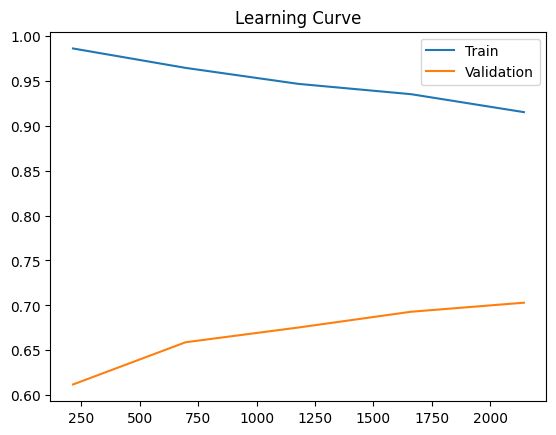

In [82]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("Learning Curve")
plt.show()

#### Our second attempt overfits even more, it's very unstable (I ran it twice and got very different results) 
#### I want to keep going with Random Forest: it overfits less with ± same validation results 
#### Though I have to say all results are not very promising 

In [86]:
# --- Test predictions ---
y_test_pred_rf = grid_rf.predict(X_test)

print("\n=== TEST RESULTS ===")
print(classification_report(y_test, y_test_pred_rf, target_names=le.classes_))


=== TEST RESULTS ===
              precision    recall  f1-score   support

  Affordable       0.75      0.61      0.67       250
  High-value       0.70      0.59      0.64       207
 Market rate       0.66      0.78      0.71       437

    accuracy                           0.69       894
   macro avg       0.70      0.66      0.68       894
weighted avg       0.69      0.69      0.69       894



In [87]:
best_rf = grid_rf.best_estimator_.named_steps['rf']

In [88]:
# Numeric features (unchanged)
num_features = numeric_features

# OneHotEncoded categorical feature names
cat_encoder = grid_rf.best_estimator_.named_steps['preprocessor'] \
    .named_transformers_['cat_nom']

cat_features = cat_encoder.get_feature_names_out(categorical_nominal)

# Combine
feature_names = list(num_features) + list(cat_features)


In [89]:
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(15)

,feature,importance
5,distance_to_city_centre,0.162702
15,accommodates,0.148604
25,room_type_Entire home/apt,0.074556
27,room_type_Private room,0.070608
17,availability_365,0.068388
18,number_of_reviews,0.045511
12,review_scores_rating,0.042222
19,estimated_occupancy_l365d,0.041162
0,host_since_months_since,0.038333
2,last_review_months_since,0.035578


#### Feature importance makes a lot of sense though despite quite bad model accuracy: 
- distance to city centre as the most important price indicator
- nr of people an apartment can fit
- time of the apartment (kind of correlates with one above)
- availability and reviews

In [90]:
import pickle

In [99]:
# saving the model we've created to a file
with open('model.bin', 'wb') as f_out:
    pickle.dump(
        {
            'model': grid_rf,
            'label_encoder': le
        },
        f_out
    )

In [100]:
# loading the file with a model
with open('model.bin', 'rb') as f_in:
    pipeline = pickle.load(f_in)

In [97]:
listing = {'host_since_months_since': 164.8,
 'first_review_months_since': 163.3,
 'last_review_months_since': 8.3,
 'host_listings_count': 1.0,
 'host_local_share': 0.5,
 'distance_to_city_centre': 1.7562604351674882,
 'has_wifi': True,
 'has_kitchen': True,
 'has_dedicated_workspace': False,
 'has_heating': True,
 'has_air_conditioning': False,
 'score_comfort': 0.10344827586206896,
 'score_safety': 0.4,
 'score_family': 0.0,
 'score_luxury': 0.08333333333333333,
 'score_tech': 0.0,
 'amenities_count': 3,
 'review_scores_rating': 4.58,
 'host_location_cat': 'amsterdam',
 'description_length': 341,
 'neighborhood_overview_length': 264,
 'accommodates': 3,
 'bathrooms': 1.0,
 'availability_365': 176,
 'number_of_reviews': 112,
 'estimated_occupancy_l365d': 16,
 'room_type': 'Entire home/apt',
 'host_response_time': 'a few days or more',
 'host_response_rate': 0.0,
 'host_acceptance_rate': 33.0,
 'host_is_superhost_binary': 0.0,
 'host_identity_verified_binary': 1.0,
 'instant_bookable_binary': 0}

In [103]:
model = pipeline['model']
le = pipeline['label_encoder']

listing_df = pd.DataFrame([listing])
pred = model.predict(listing_df)

pred_final = le.inverse_transform(pred)[0]

print("Predicted category of the listing =", pred_final)

Predicted category of the listing = Market rate


## Appendix

### This is an attempt to see what if we predict price instead of a price group
### I didn't use it in the end but I'll keep it here just in case 

In [71]:
features_ready.append('price')

In [72]:
df_model_price = df_new[features_ready].dropna()

# --- Prepare data ---
X = df_model_price.drop(columns=['price_class', 'price'])  # your features
y = df_model_price['price']          # numeric price

In [73]:
# Train / validation / test split
X_fulltrain, X_test, y_fulltrain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_fulltrain, y_fulltrain, test_size=0.25, random_state=42)

In [77]:
# --- Identify feature types ---
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_nominal = ['room_type', 'host_response_time']  # OneHotEncoding

In [78]:
# --- ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat_nom', OneHotEncoder(handle_unknown='ignore'), categorical_nominal)
    ]
)

In [81]:
# --- Linear Regression ---

lr_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat_nom', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [85]:
def evaluate(model, X, y):
    pred = model.predict(X)
    return {
        "RMSE": root_mean_squared_error(y, pred),
        "MAE": mean_absolute_error(y, pred),
        "R2": r2_score(y, pred)
    }

In [88]:
results = {
    "Linear Regression": evaluate(lr_pipeline, X_val, y_val)
}

print(results)

{'Linear Regression': {'RMSE': 99.5934013932241, 'MAE': 68.0720883312558, 'R2': 0.46823017303905345}}


In [90]:
# --- Random Forest Regressor ---
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

rf_params = {
    "model__n_estimators": [150, 300],
    "model__max_depth": [5, 10, None],
    "model__min_samples_split": [2, 5]
}

rf_gs = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
rf_gs.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__max_depth': [5, 10, ...], 'model__min_samples_split': [2, 5], 'model__n_estimators': [150, 300]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and pa

In [93]:
results = {
    "Random Forest": evaluate(rf_gs, X_val, y_val)
}

print(results)

{'Random Forest': {'RMSE': 91.27223552423459, 'MAE': 61.29935495898584, 'R2': 0.5533781798909875}}


In [95]:
xgb_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        eval_metric="rmse"
    ))
])

xgb_params = {
    "model__n_estimators": [200, 300],
    "model__max_depth": [3, 5],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0]
}

xgb_gs = GridSearchCV(xgb_pipeline, xgb_params, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
xgb_gs.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__learning_rate': [0.05, 0.1], 'model__max_depth': [3, 5], 'model__n_estimators': [200, 300], 'model__subsample': [0.8, 1.0]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computat

In [96]:
results = {
    "XGBoost": evaluate(xgb_gs, X_val, y_val)
}

print(results)

{'XGBoost': {'RMSE': 86.35256709523941, 'MAE': 58.138910822687, 'R2': 0.6002273609248827}}
